In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Note: API Key from OpenWeather website
# on config.py sheet

In [2]:
#[1] 6.1.4

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#[2]

# Add the latitudes and longitudes to a list.
# note: this code was generated on API_practice sheet
# the next cell (coordinates) unzips the previous code
coordinates = list(lat_lngs)

In [4]:
coordinates

[(7.539905942138731, -115.79765718258484),
 (82.43389619052363, 121.13344871821317),
 (-57.154242239077746, -26.851686926719367),
 (85.94154794459186, -47.22070121438756),
 (1.247408275118147, -40.533975846999795),
 (-11.130075050471731, 4.56930563300881),
 (-10.125762237240409, -28.4514307302897),
 (0.37098901428069553, 131.2723455702187),
 (19.779515061715713, -49.66135439262797),
 (21.20886197793972, 13.614265231959962),
 (-33.08645804608551, 99.1249486931448),
 (12.930791399167475, 31.57253145318282),
 (-1.9944637699214383, 127.98667975859814),
 (-57.676904920556694, 95.28579447254742),
 (49.595404173572064, -172.65791035832015),
 (38.339086439739305, 97.89503953786016),
 (-22.02969996360997, 95.17497071292729),
 (-45.04134576448777, -32.89985624032826),
 (15.483966218731211, 133.89689763283604),
 (-43.60657829861198, 29.43197164403955),
 (-36.64047357181655, 103.74798063390244),
 (-30.159939221255826, -87.49400725907894),
 (89.08661962446138, -141.01227795703537),
 (54.25134028481

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy         

In [6]:
#[3]

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [7]:
#[4] 6.2.6

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c65ada4e44aea17f126e673d0507af96


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [10]:
#[5]

# initialized the counters at 1 because we want 
# the first iteration of the logging for each recorded 
# response and the set to start at 1

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Next, we need to iterate through our list of cities 
# and begin building the URL for each city, while grouping 
# our records in sets of 50. To do this, use 
# for i in range(len(cities)) and the index to tell us when we get to 50. 
# We can also retrieve the city from the cities list and add it to 
# the city_url by using indexing, as shown in the following code:


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Every time we want to reference the city in our code, 
# we need to use the indexing on the cities list. Unfortunately, 
# this will cause programming errors when we are building the city_url 
# because it adds the index, not the city name, to the city_url. 
# To fix this issue, we need to create another for loop to get the city from the cities list.

# Instead of using two for loops, we can use the enumerate() method as 
# an alternative way to iterate through the list of cities and retrieve both the index, 
# and the city from the list. The syntax for the enumerate() method is the following:
# for i, item in enumerate(list):

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    
# We create the for loop with the enumerate() method and reference the index and the city in the list.

# In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and 
# if the index is greater than or equal to 50. If the statement is true, then the set_count and the 
# record_count are incremented by 1.

# Inside the conditional statement, we create the URL endpoint for each city, as before. However, 
# we are removing the blank spaces in the city name and concatenating the city name with, 
# city.replace(" ","+"). This will find the corresponding weather data for the city instead of 
# finding the weather data for the first part of the city name.

# Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas (Links to an external site.).

# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.

# Then we add one to the record count before the next city is processed.
# Next, we will retrieve the data from the JSON weather response for each city.

# handle errors while parsing weather data from a JSON file.
# try:
  #Do something
#except:
  #print("An exception occurred")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | san patricio
Processing Record 2 of Set 13 | saskylakh
Processing Record 3 of Set 13 | chuy
Processing Record 4 of Set 13 | upernavik
Processing Record 5 of Set 13 | camocim
Processing Record 6 of Set 13 | namibe
Processing Record 7 of Set 13 | olinda
Processing Record 8 of Set 13 | sorong
Processing Record 9 of Set 13 | bathsheba
Processing Record 10 of Set 13 | bilma
Processing Record 11 of Set 13 | geraldton
Processing Record 12 of Set 13 | tandalti
Processing Record 13 of Set 13 | amahai
Processing Record 14 of Set 13 | busselton
Processing Record 15 of Set 13 | provideniya
Processing Record 16 of Set 13 | yumen
Processing Record 17 of Set 13 | carnarvon
Processing Record 18 of Set 13 | cidreira
Processing Record 19 of Set 13 | meyungs
City not found. Skipping...
Processing Record 20 of Set 13 | port alfred
Processing Record 21 of Set 13 | lebu
Processing Record 22 of Set 13 | tuktoyaktuk
Pr

Processing Record 34 of Set 16 | walvis bay
Processing Record 35 of Set 16 | adrar
Processing Record 36 of Set 16 | hithadhoo
Processing Record 37 of Set 16 | pisco
Processing Record 38 of Set 16 | vila velha
Processing Record 39 of Set 16 | nuuk
Processing Record 40 of Set 16 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 16 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 16 | smithers
Processing Record 43 of Set 16 | leningradskiy
Processing Record 44 of Set 16 | mackenzie
Processing Record 45 of Set 16 | maceio
Processing Record 46 of Set 16 | conceicao da barra
Processing Record 47 of Set 16 | ukiah
Processing Record 48 of Set 16 | saleaula
City not found. Skipping...
Processing Record 49 of Set 16 | fuerte olimpo
Processing Record 50 of Set 16 | samusu
City not found. Skipping...
Processing Record 1 of Set 17 | papillion
Processing Record 2 of Set 17 | middlebury
Processing Record 3 of Set 17 | fallon
Processing Record 4 of Set 17 | pra

City not found. Skipping...
Processing Record 17 of Set 20 | wanning
Processing Record 18 of Set 20 | nyurba
Processing Record 19 of Set 20 | san cristobal
Processing Record 20 of Set 20 | victoria
Processing Record 21 of Set 20 | sechura
Processing Record 22 of Set 20 | lagunas
Processing Record 23 of Set 20 | beisfjord
Processing Record 24 of Set 20 | gonbad-e qabus
Processing Record 25 of Set 20 | ljungby
Processing Record 26 of Set 20 | salalah
Processing Record 27 of Set 20 | lugovoy
Processing Record 28 of Set 20 | alexandria
Processing Record 29 of Set 20 | stokmarknes
Processing Record 30 of Set 20 | puerto el triunfo
Processing Record 31 of Set 20 | pachino
Processing Record 32 of Set 20 | caernarfon
Processing Record 33 of Set 20 | los llanos de aridane
Processing Record 34 of Set 20 | muros
Processing Record 35 of Set 20 | farafangana
Processing Record 36 of Set 20 | minot
Processing Record 37 of Set 20 | alotau
City not found. Skipping...
Processing Record 38 of Set 20 | kh

Processing Record 50 of Set 23 | ostashkov
Processing Record 1 of Set 24 | port hedland
Processing Record 2 of Set 24 | eureka
Processing Record 3 of Set 24 | strai
Processing Record 4 of Set 24 | axim
Processing Record 5 of Set 24 | janauba
Processing Record 6 of Set 24 | cascais
Processing Record 7 of Set 24 | north marysville
City not found. Skipping...
Processing Record 8 of Set 24 | beringovskiy
Processing Record 9 of Set 24 | san juan
Processing Record 10 of Set 24 | arkadelphia
Processing Record 11 of Set 24 | carutapera
Processing Record 12 of Set 24 | ewa beach
Processing Record 13 of Set 24 | nhulunbuy
Processing Record 14 of Set 24 | parras
City not found. Skipping...
Processing Record 15 of Set 24 | isla mujeres
Processing Record 16 of Set 24 | shchelyayur
City not found. Skipping...
Processing Record 17 of Set 24 | great yarmouth
Processing Record 18 of Set 24 | las vegas
Processing Record 19 of Set 24 | gorontalo
Processing Record 20 of Set 24 | mayo
Processing Record 21 

In [11]:
len(city_data)

578

In [12]:
#[6]

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Patricio,28.0170,-97.5169,77.00,78,75,6.91,US,2021-03-23 15:45:47
1,Saskylakh,71.9167,114.0833,-37.61,100,43,5.46,RU,2021-03-23 15:45:47
2,Chuy,-33.6971,-53.4616,75.02,56,24,7.00,UY,2021-03-23 15:45:48
3,Upernavik,72.7868,-56.1549,-8.12,85,100,4.50,GL,2021-03-23 15:45:48
4,Camocim,-2.9022,-40.8411,83.17,72,100,7.07,BR,2021-03-23 15:45:48
5,Namibe,-15.1961,12.1522,75.56,76,94,10.27,AO,2021-03-23 15:45:48
6,Olinda,-8.0089,-34.8553,84.20,65,40,9.22,BR,2021-03-23 15:45:49
7,Sorong,-0.8833,131.2500,80.92,79,100,7.38,ID,2021-03-23 15:45:49
8,Bathsheba,13.2167,-59.5167,84.20,48,20,24.16,BB,2021-03-23 15:45:49
9,Bilma,18.6853,12.9164,94.03,11,2,15.93,NE,2021-03-23 15:45:50


In [13]:
# Next, we'll reorder the columns as City, Country, 
# Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, 
# so they are easy to read.

# Recall that to reorder the columns, we assign a variable to an array 
# of the columns in the order we want them to appear:

# new_column_order = ["column2", "column4", "column1"]

# Then, we assign a new or the same DataFrame with new column order:

# df = df[new_column_order]

city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2021-03-23 15:45:47,28.0170,-97.5169,77.00,78,75,6.91
1,Saskylakh,RU,2021-03-23 15:45:47,71.9167,114.0833,-37.61,100,43,5.46
2,Chuy,UY,2021-03-23 15:45:48,-33.6971,-53.4616,75.02,56,24,7.00
3,Upernavik,GL,2021-03-23 15:45:48,72.7868,-56.1549,-8.12,85,100,4.50
4,Camocim,BR,2021-03-23 15:45:48,-2.9022,-40.8411,83.17,72,100,7.07
...,...,...,...,...,...,...,...,...,...
573,Lewistown,US,2021-03-23 15:49:10,40.5992,-77.5714,57.00,44,1,3.91
574,Severnoye,RU,2021-03-23 15:49:10,56.3491,78.3619,25.09,95,100,4.16
575,Utiel,ES,2021-03-23 15:49:11,39.5667,-1.2000,64.99,70,6,13.13
576,Quatre Cocos,MU,2021-03-23 15:49:11,-20.2078,57.7625,82.40,78,75,4.61


In [14]:
#[7]

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
#[8]

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

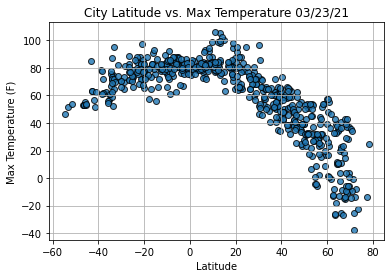

In [20]:
#[9]

# add time.strftime("%x") to our plt.title() function in our scatter plot.

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

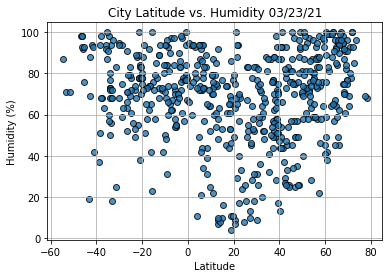

In [32]:
#[10]

# The balance of the scatter plots will share the same format. 
# All we need to do is change the y-axis variable for each 
# weather parameter. Let's create the scatter plots quickly 
# by copying the code and changing the y-axis variable.

# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()



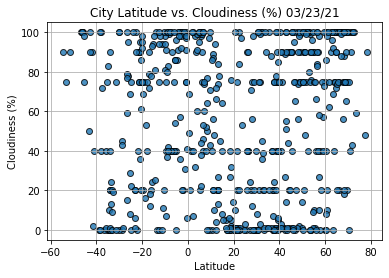

In [30]:
#[10a]

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

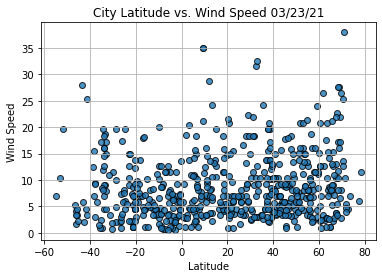

In [27]:
#[10b]

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()